# Comparing Adam and Scoop on Hyperparameters Optimization vs ASCADv1

This notebook is the supplementary material for section 6.2.3 of the paper: "Scoop: An Optimization Algorithm for Profiling Attacks against Higher-Order Masking", and in particular, produces the data for Table 2. It imports the results of the hyperparameters optimization for the ASCADv1 dataset with an MLP and a CNN. The results are stored in a database: `ascadv1_finetuning_comparison.db` which is an optuna database. In it, there are 4 entries:
- `adam`: the results of the hyperparameters optimization with Adam on the MLP
- `scoop`: the results of the hyperparameters optimization with Scoop on the MLP
- `adam_cnn1`: the results of the hyperparameters optimization with Adam on the CNN
- `scoop_cnn1`: the results of the hyperparameters optimization with Scoop on the CNN

Each entry contains the hyperparameters tried, which are the same for both scoop and adam, the reached validation loss as well as training curves. In addition, that is not included to the paper, are the models' distribution by validation losses on MLP and CNN, one can see that Scoop has a better distribution of models with lower validation losses.

In [1]:
import numpy as np
import optuna
import matplotlib.pyplot as plt

optuna_db = f"sqlite:///ascadv1_finetuning_comparison.db"

c:\Users\T0301147\AppData\Local\miniconda3\envs\scoop_ches25\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


# MLP

In [2]:
study = optuna.load_study(study_name="scoop", storage=optuna_db)
threshold = 7.95
nb_success = 0

scoop_values = []
plateau_lengths = []
PIs = []
#get total duration
total_duration = 0
train_time_successful = []
#loop for each trial
for trial in study.trials:
    if trial.value is not None:
        if trial.value < 8.1:
            scoop_values.append(trial.value)
            total_duration += trial.duration.total_seconds()
    # get user attributes
        nb_of_epochs = len(trial.user_attrs['val_loss'])
        duration = trial.duration.total_seconds()
        train_time_successful.append(duration/nb_of_epochs)
        if trial.value < threshold and nb_of_epochs > 1:
            PIs.append(trial.value)
            nb_success += 1
    


x = np.arange(len(scoop_values))
scoop_values1 = scoop_values


number_of_successful_trials_scoop = nb_success
success_rate_scoop = number_of_successful_trials_scoop / len(scoop_values)
mean_pi = np.mean(PIs)
min_pi = np.min(PIs)
max_pi = np.max(PIs)
train_time_mean = np.mean(train_time_successful)
print(f"Total duration for Scoop: {total_duration/3600} hours")
print(f"Cost per epoch: {train_time_mean} seconds")
print(f"Success rate for scoop: {success_rate_scoop}")
print(f"Mean PI for Scoop: {mean_pi} bits, min: {min_pi}, max: {max_pi}")

Total duration for Scoop: 0.8178103341666665 hours
Cost per epoch: 0.9148729881687406 seconds
Success rate for scoop: 0.040983606557377046
Mean PI for Scoop: 7.828025824531676 bits, min: 7.6998113178071526, max: 7.948185617961581


Total duration for adam: 0.5129117950000003 hours
Cost per epoch: 0.30725438794067583 seconds
Success rate for adam: 0.021897810218978103
Mean PI for adam: 7.929413340575645 bits, min: 7.922266195690821, max: 7.939815643855503


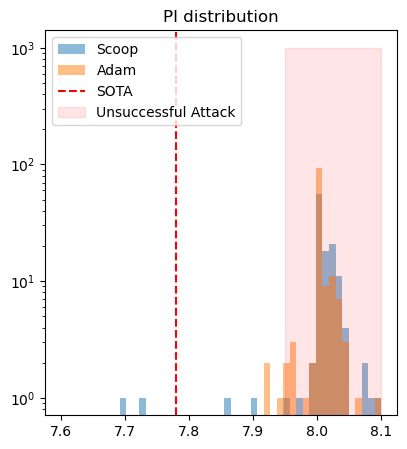

In [3]:
study = optuna.load_study(study_name="adam", storage=optuna_db)
threshold = 7.95

scoop_values = []
train_time_successful = []
val_loss_matrix = []
train_loss_matrix = []
nb_success = 0


PIs = []
#loop for each trial
total_duration = 0
for trial in study.trials:
    if trial.value is not None:
        if trial.value < 8.1:
            total_duration += trial.duration.total_seconds()
            scoop_values.append(trial.value)
    # get user attributes            
        nb_of_epochs = len(trial.user_attrs['val_loss'])
        duration = trial.duration.total_seconds()
        train_time_successful.append(duration/nb_of_epochs)
        if trial.value < threshold and nb_of_epochs > 1:
            PIs.append(trial.value)
            val_loss_matrix.append(trial.user_attrs['val_loss'])
            train_loss_matrix.append(trial.user_attrs['train_loss'])
            nb_success += 1




x = np.arange(len(scoop_values))

bins = np.linspace(7.6, 8.1, 50)

plt.figure(figsize=(10, 5))
subfig = plt.subplot(121)
subfig.hist(scoop_values1, bins=bins, alpha=0.5, label="Scoop")
subfig.hist(scoop_values, bins=bins, alpha=0.5, label="Adam")
subfig.set_title("PI distribution")
plt.axvline(x=7.78, color='red', linestyle='--', label="SOTA")
plt.yscale('log')
# fill the area from ]8:+inf[
subfig.fill_between([7.95, 8.1], 0, 1000, color='red', alpha=0.1, label="Unsuccessful Attack")
subfig.legend()

number_of_successful_trials_scoop = nb_success
success_rate_scoop = number_of_successful_trials_scoop / len(scoop_values)
mean_pi = np.mean(PIs)
min_pi = np.min(PIs)
max_pi = np.max(PIs)
train_time_mean = np.mean(train_time_successful)

print(f"Total duration for adam: {total_duration/3600} hours")
print(f"Cost per epoch: {train_time_mean} seconds")
print(f"Success rate for adam: {success_rate_scoop}")
print(f"Mean PI for adam: {mean_pi} bits, min: {min_pi}, max: {max_pi}")

# CNN

In [4]:
study = optuna.load_study(study_name="scoop_cnn1", storage=optuna_db)
threshold = 7.95

scoop_values = []
train_time_successful = []
train_time_successful = []
val_loss_matrix = []
train_loss_matrix = []
nb_success = 0
idx = []


PIs = []
#loop for each trial
total_duration = 0
for trial in study.trials:
    if trial.value is not None:
        if trial.value < 8.1:
            scoop_values.append(trial.value)
            total_duration += trial.duration.total_seconds()
        nb_of_epochs = len(trial.user_attrs['val_loss'])
        duration = trial.duration.total_seconds()
        train_time_successful.append(duration/nb_of_epochs)
        if trial.value < threshold and nb_of_epochs > 1:
            PIs.append(trial.value)
            val_loss_matrix.append(trial.user_attrs['val_loss'])
            train_loss_matrix.append(trial.user_attrs['train_loss'])
            nb_success += 1
            idx.append(trial.number)

x = np.arange(len(scoop_values))
scoop_values1 = scoop_values

number_of_successful_trials_scoop = nb_success
success_rate_scoop = number_of_successful_trials_scoop / len(scoop_values)
mean_pi = np.mean(PIs)
min_pi = np.min(PIs)
max_pi = np.max(PIs)
train_time_mean = np.mean(train_time_successful)

print(f"Total duration for scoop: {total_duration/3600} hours")
print(f"Cost per epoch: {train_time_mean} seconds")
print(f"Success rate for scoop: {success_rate_scoop}")
print(f"Mean PI for scoop: {mean_pi} bits, min: {min_pi}, max: {max_pi}")

Total duration for scoop: 2.997689555000001 hours
Cost per epoch: 3.7447447634806315 seconds
Success rate for scoop: 0.15384615384615385
Mean PI for scoop: 7.862333719389786 bits, min: 7.762454944320872, max: 7.937845011425626


Total duration for adam: 4.185524998333333 hours
Cost per epoch: 3.1659977502402734 seconds
Success rate for adam: 0.07792207792207792
Mean PI for adam: 7.860493753214059 bits, min: 7.800514224228586, max: 7.92415531703404


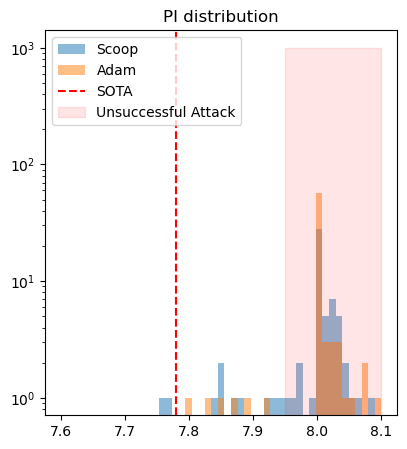

In [5]:
study = optuna.load_study(study_name="adam_cnn1", storage=optuna_db)
threshold = 7.95

scoop_values = []
train_time_successful = []
scoop_values = []
train_time_successful = []
val_loss_matrix = []
train_loss_matrix = []
nb_success = 0
idx = []
PIs = []
#loop for each trial
total_duration = 0
for trial in study.trials:
    if trial.value is not None:
        if trial.value < 8.1:
            scoop_values.append(trial.value)
            total_duration += trial.duration.total_seconds()
    # get user attributes
        nb_of_epochs = len(trial.user_attrs['val_loss'])
        duration = trial.duration.total_seconds()
        train_time_successful.append(duration/nb_of_epochs)
        if trial.value < threshold and nb_of_epochs > 1:
            PIs.append(trial.value)
            val_loss_matrix.append(trial.user_attrs['val_loss'])
            train_loss_matrix.append(trial.user_attrs['train_loss'])
            nb_success += 1
            idx.append(trial.number)

bins = np.linspace(7.6, 8.1, 50)

plt.figure(figsize=(10, 5))
subfig = plt.subplot(121)
subfig.hist(scoop_values1, bins=bins, alpha=0.5, label="Scoop")
subfig.hist(scoop_values, bins=bins, alpha=0.5, label="Adam")
subfig.set_title("PI distribution")
plt.axvline(x=7.78, color='red', linestyle='--', label="SOTA")
plt.yscale('log')
# fill the area from ]8:+inf[
subfig.fill_between([7.95, 8.1], 0, 1000, color='red', alpha=0.1, label="Unsuccessful Attack")
subfig.legend()


number_of_successful_trials_scoop = nb_success
success_rate_scoop = number_of_successful_trials_scoop / len(scoop_values)
mean_pi = np.mean(PIs)
min_pi = np.min(PIs)
max_pi = np.max(PIs)
train_time_mean = np.mean(train_time_successful)

print(f"Total duration for adam: {total_duration/3600} hours")
print(f"Cost per epoch: {train_time_mean} seconds")
print(f"Success rate for adam: {success_rate_scoop}")
print(f"Mean PI for adam: {mean_pi} bits, min: {min_pi}, max: {max_pi}")